<a href="https://colab.research.google.com/github/duTianze/machine-learning/blob/master/autoencoder_denosiy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers

In [0]:
# Loads the training and test data sets (ignoring class labels)
(x_train, _), (x_test, _) = mnist.load_data()

# Scales the training and test data to range between 0 and 1.
max_value = float(x_train.max())
x_train = x_train.astype('float32') / max_value
x_test = x_test.astype('float32') / max_value

In [28]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [29]:
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

(x_train.shape, x_test.shape)

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [36]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))

# Decoder Layers
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_12 (UpSampling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 14, 14, 32)        9248      
__________

In [0]:
x_train_noisy = x_train + np.random.normal(loc=0.0, scale=0.5, size=x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

x_test_noisy = x_test + np.random.normal(loc=0.0, scale=0.5, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [39]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=128,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.0969 - val_loss: 0.0960
Epoch 2/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0966 - val_loss: 0.0957
Epoch 3/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.0964 - val_loss: 0.0956
Epoch 4/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0962 - val_loss: 0.0954
Epoch 5/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0960 - val_loss: 0.0952
Epoch 6/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.0959 - val_loss: 0.0951
Epoch 7/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0958 - val_loss: 0.0951
Epoch 8/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0956 - val_loss: 0.0950
Epoch 9/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0955 - val_loss: 0.0

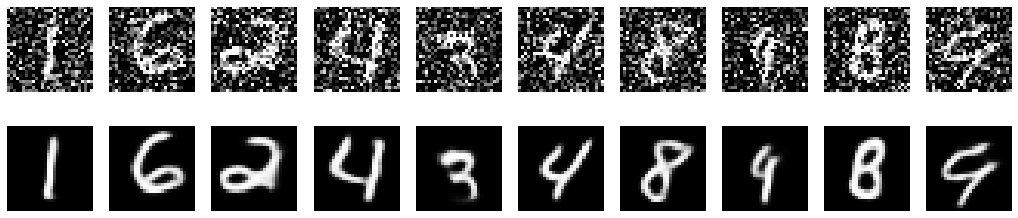

In [41]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)
x_test_denoised = autoencoder.predict(x_test_noisy)
plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test_noisy[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(x_test_denoised[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()